In [1]:
import pandas as pd
import numpy as np
import json

#### Load Twitter Archive Enhanced

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Load Tweet JSON

In [4]:
tweets_json = [line.rstrip('\n') for line in open('tweet_json3.txt')]

#### Load Image Predicition File

In [5]:
df_image_predict = pd.read_csv('image_prediction_file.tsv',sep='\t')

## Assess

#### Twitter archive enhanced file

In [6]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_twitter['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [8]:
df_twitter['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [9]:
df_twitter['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [10]:
df_twitter['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

- I thought variables 'floofer', 'pupper', 'doggo' and 'puppo' should be exclusive, in another words, if the row contain the value 1 for pupper variable, so the value variable for 'doggo', and the others, should be 0. But not, the variables are not exclusives.

In [11]:
df_twitter[df_twitter['pupper'] == 'pupper']['doggo'].value_counts()

None     245
doggo     12
Name: doggo, dtype: int64

In [12]:
df_twitter['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [13]:
df_twitter['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [14]:
df_twitter['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [15]:
df_twitter['retweeted_status_timestamp'].value_counts()

2015-12-02 03:40:57 +0000    1
2017-03-08 18:52:12 +0000    1
2017-03-08 01:41:24 +0000    1
2016-09-09 18:31:54 +0000    1
2016-03-09 16:56:11 +0000    1
2016-10-06 01:23:05 +0000    1
2015-12-22 04:35:49 +0000    1
2016-06-08 22:48:46 +0000    1
2016-03-24 01:11:29 +0000    1
2017-02-28 18:43:57 +0000    1
2016-09-22 20:33:42 +0000    1
2017-03-04 00:21:08 +0000    1
2015-12-24 00:58:27 +0000    1
2015-11-28 03:31:48 +0000    1
2016-09-28 00:46:20 +0000    1
2016-12-07 22:38:52 +0000    1
2016-11-09 00:37:46 +0000    1
2015-12-06 00:17:55 +0000    1
2016-05-16 00:31:53 +0000    1
2016-01-25 00:26:41 +0000    1
2016-10-25 16:00:09 +0000    1
2016-01-08 05:00:14 +0000    1
2015-12-23 00:45:35 +0000    1
2016-07-05 20:41:01 +0000    1
2017-05-21 16:48:45 +0000    1
2017-02-17 03:39:51 +0000    1
2016-11-22 00:10:52 +0000    1
2017-02-02 01:01:21 +0000    1
2016-09-02 18:03:10 +0000    1
2016-07-12 18:27:35 +0000    1
                            ..
2016-08-08 01:44:46 +0000    1
2016-08-

- ''These ratings almost always have a denominator of 10''

In [16]:
df_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- ''The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."

In [17]:
df_twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
pd.set_option('display.max_colwidth', -1) # permit the unlimited number of characters

In [19]:
df_twitter[df_twitter['rating_numerator'] < 10][['text','rating_numerator','retweeted_status_id','retweeted_status_user_id','tweet_id']]

,text,rating_numerator,retweeted_status_id,retweeted_status_user_id,tweet_id
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,NaN,NaN,883482846933004288
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,NaN,NaN,848212111729840128
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,NaN,NaN,835152434251116546
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,NaN,NaN,826598799820865537
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,6.924173e+17,4.196984e+09,817502432452313088
485,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,6.981954e+17,4.196984e+09,814578408554463233
599,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,6.769365e+17,4.196984e+09,798682547630837760
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,6.661041e+17,4.196984e+09,798576900688019456
730,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,NaN,NaN,781661882474196992
745,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,7.533757e+17,4.196984e+09,780092040432480260


In [20]:
df_twitter[df_twitter['text'].str.contains("&")].head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05

In [21]:
df_twitter['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                                                                                                                                                
1       https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                                                                                                                                                
2       https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                                                                                                                                                
3       https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                                                                                         

In [ ]:
a = 'https://twitter.com/dog_rates/status/888804989199671297/photo/1'
b = 'https://twitter.com/dog_rates/status/888804989199671297/photo/1'

##### Assessing expanded urls

In [22]:
temp = df_twitter['expanded_urls'].str.split(",", n = -1, expand = True) 

In [23]:
temp.head()

,0,1,2,3,4,5,6,7
0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,None,None,None,None,None,None,None
1,https://twitter.com/dog_rates/status/892177421306343426/photo/1,None,None,None,None,None,None,None
2,https://twitter.com/dog_rates/status/891815181378084864/photo/1,None,None,None,None,None,None,None
3,https://twitter.com/dog_rates/status/891689557279858688/photo/1,None,None,None,None,None,None,None
4,https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1,None,None,None,None,None,None


In [24]:
temp[temp[7].notnull()]

,0,1,2,3,4,5,6,7
446,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1
447,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1
702,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1,https://twitter.com/dog_rates/status/779834332596887552/photo/1
811,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1


In [25]:
temp.iloc[811]

0    https://twitter.com/dog_rates/status/673320132811366400/photo/1
1    https://twitter.com/dog_rates/status/673320132811366400/photo/1
2    https://twitter.com/dog_rates/status/673320132811366400/photo/1
3    https://twitter.com/dog_rates/status/673320132811366400/photo/1
4    https://twitter.com/dog_rates/status/673320132811366400/photo/1
5    https://twitter.com/dog_rates/status/673320132811366400/photo/1
6    https://twitter.com/dog_rates/status/673320132811366400/photo/1
7    https://twitter.com/dog_rates/status/673320132811366400/photo/1
Name: 811, dtype: object

#### Tweet JSON file

- tweet ID, retweet count, and favorite count.

In [26]:
json.loads(tweets_json[1])

{'created_at': 'Sat Jul 15 23:25:31 +0000 2017',
 'id': 886366144734445568,
 'id_str': '886366144734445568',
 'text': 'This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 dee… https://t.co/iIu3AF8IWH',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/iIu3AF8IWH',
    'expanded_url': 'https://twitter.com/i/web/status/886366144734445568',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [117, 140]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs™ 🏳️\u200d🌈',
  'screen_name': 'dog_rates',
  'location': '「 DM YOUR DOGS 」',
  'description': 'Your Only Sou

#### Image Prediction File

In [27]:
df_image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

etc.

In [29]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df_image_predict['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

#### Quality

##### `twitter-archive-enhanced` table
- `tweet_id` is numeric, it should be string
- `source` has unwanted strings, should extrac specific parts: Twitter for iPhone,Twitter Web Client,Vine - Make a Scene and TweetDeck
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id` and `retweeted_status_user_id` are numeric, they should be string
- `text` contain 'HTML Names' as: '&amp\;', '&gt\;' and '&lt\;'

#### Tidiness

##### `twitter-archive-enhanced` table
- `timestamp` has hour and date, should be splitted into others columns
- `expanded_urls` contains link for another sites and there are duplicated links

##### `tweer json` table
- `tweet_id` duplicated in twitter-archive-enhanced table
- this informations should be in same table
- Extract `user_id`

## Clean

##### `twitter-archive-enhanced` table

- Convert `tweet_id`,`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id` and `retweeted_status_user_id` to String

In [13]:
# Code 
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str)
df_twitter['in_reply_to_status_id'] = df_twitter['in_reply_to_status_id'].astype(str)
df_twitter['in_reply_to_user_id'] = df_twitter['in_reply_to_user_id'].astype(str)
df_twitter['retweeted_status_id'] = df_twitter['retweeted_status_id'].astype(str)
df_twitter['retweeted_status_id'] = df_twitter['retweeted_status_id'].astype(str)
df_twitter['retweeted_status_user_id'] = df_twitter['retweeted_status_user_id'].astype(str)

In [14]:
# Test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


- Extrac specific parts from `source`: Twitter for iPhone,Twitter Web Client,Vine - Make a Scene and TweetDeck

In [16]:
# Code
df_twitter['source'] = df_twitter['source'].str.extract(r'>(.*)<')

In [17]:
# Test
df_twitter['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

- Convert `&amp;`, `&gt;`, `&lt;` and `\n` to &, >, < and space, respectively.

In [18]:
# Code
import html
df_twitter['text'] = df_twitter['text'].apply(html.unescape)
df_twitter['text'] = df_twitter['text'].str.replace('\n',' ')

In [19]:
# Test
def check_match_substring(text):    
    list_of_substrings = ('&amp;','&gt;','&lt;','\n')
    if any(s in text for s in list_of_substrings):
        return True
    else:
        return False

In [20]:
df_twitter[df_twitter['text'].apply(check_match_substring)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- Create a variable to identify if has name

In [165]:
# Code
result['has_name'] = result['name'].apply(lambda x: x != 'None')

In [166]:
# Test
result[['name','has_name']].head(10)

,name,has_name
0,Phineas,True
1,Tilly,True
2,Archie,True
3,Darla,True
4,Franklin,True
5,None,False
6,Jax,True
7,None,False
8,Zoey,True
9,Cassie,True


- Convert `timestamp` to datetime type and split date and hour into columns.

In [21]:
# Code
df_twitter['date'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.date

In [22]:
# Code
df_twitter['time'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.time

In [42]:
df_twitter['weekday'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.weekday_name

In [51]:
df_twitter['hour'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.hour

In [138]:
df_twitter['year'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.year
df_twitter['month'] = pd.to_datetime(df_twitter['timestamp'],errors='coerce').dt.month

In [23]:
# Test
df_twitter['date'].head()

0    2017-08-01
1    2017-08-01
2    2017-07-31
3    2017-07-30
4    2017-07-29
Name: date, dtype: object

In [39]:
# Test
df_twitter['time'].head()

0    16:23:56
1    00:17:27
2    00:18:03
3    15:58:51
4    16:00:24
Name: time, dtype: object

In [43]:
df_twitter['weekday'].head()

0     Tuesday
1     Tuesday
2      Monday
3      Sunday
4    Saturday
Name: weekday, dtype: object

In [52]:
df_twitter['hour'].head()

0    16
1     0
2     0
3    15
4    16
Name: hour, dtype: int64

In [139]:
df_twitter['year'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int64

In [140]:
df_twitter['month'].head()

0    8
1    8
2    7
3    7
4    7
Name: month, dtype: int64

- Split the urls in `expanded_urls`, remove duplicated links and no twitter url.

In [25]:
# Code
def drop_duplicated_urls(urls):
    
    empty_list = []
    if isinstance(urls, str):
        fully_list = list(urls.split(','))
        
        for item in fully_list:
            if(item not in empty_list and item != None and 'twitter' in item):
                empty_list.append(item)

    return empty_list

In [26]:
expanded_urls = df_twitter['expanded_urls'].apply(drop_duplicated_urls)

In [27]:
df_twitter['expanded_urls'] = pd.DataFrame(expanded_urls.values.tolist())

In [28]:
# Test
df_twitter['expanded_urls'].head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

##### `tweer json` table

- Extract `id`,`retweet_count`,`favorite_count`  from JSON and store into dataframe, after that joint this dataframe with twitter archive enhanced dataframe.

In [10]:
tweet_json_list = []
for tweet_json_item in tweets_json:
    temp_list = []
    temp_list.append(json.loads(tweet_json_item)['id_str'])
    temp_list.append(json.loads(tweet_json_item)['user']['id_str'])
    temp_list.append(json.loads(tweet_json_item)['retweet_count'])
    temp_list.append(json.loads(tweet_json_item)['favorite_count'])
    tweet_json_list.append(temp_list)

In [11]:
df_tweet_json = pd.DataFrame(tweet_json_list,columns=['tweet_id','user_id','retweet_count','favorite_count'])

In [12]:
df_tweet_json.head()

,tweet_id,user_id,retweet_count,favorite_count
0,876484053909872640,4196983835,2308,18207
1,886366144734445568,4196983835,3070,20487
2,877611172832227328,4196983835,77,0
3,888078434458587136,4196983835,3342,21060
4,891689557279858688,4196983835,8304,40744


### Merge tables

In [142]:
result = pd.merge(df_twitter, df_tweet_json, how='left', left_on=['tweet_id'], right_on=['tweet_id'])
#result.drop('id',axis=1,inplace=True)

In [77]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2190 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                         

In [33]:
result.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,date,time,user_id,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,2017-08-01,16:23:56,4196983835,8141.0,37446.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,2017-08-01,00:17:27,4196983835,6031.0,32179.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,2017-07-31,00:18:03,4196983835,3993.0,24265.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,2017-07-30,15:58:51,4196983835,8304.0,40744.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,2017-07-29,16:00:24,4196983835,8995.0,38974.0


### Save table in csv file

In [34]:
result.to_csv('twitter_archive_master.csv',index=False)

## Exploratory Data Analysis

### Questions

1. How many tweets were answered per user?
2. How many tweets were retweeted per user?
3. What is the distribuition of tweets during the day?
4. What is the distribuition of tweets during the days of the week?
5. What is the source most used to post?
6. The presence of the dog name increase the amount of favorites and retweets?
7. The presence of the stage of dog increase the amount of favorites and retweets?
8. What is the distribuition os the tweets during the months

In [36]:
import seaborn as sns

In [56]:
result.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,None,None,None,None,2017-08-01,16:23:56,8141.0,37446.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,None,None,None,None,2017-08-01,00:17:27,6031.0,32179.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,10,Archie,None,None,None,None,2017-07-31,00:18:03,3993.0,24265.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,10,Darla,None,None,None,None,2017-07-30,15:58:51,8304.0,40744.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,...,10,Franklin,None,None,None,None,2017-07-29,16:00:24,8995.0,38974.0


##### 1. How many tweets were answered per user?

Text(0.5, 1.0, 'Amount of tweets replies by user')

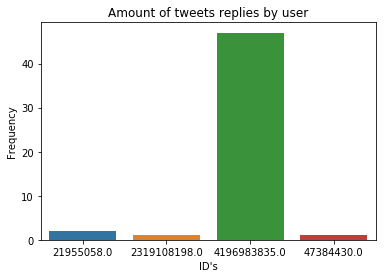

In [37]:
reply_user_id = result['in_reply_to_user_id'].value_counts()[1:5]
reply_user_id
ax = sns.barplot(x=reply_user_id.index, y=reply_user_id.values)
ax.set(xlabel='ID\'s', ylabel='Frequency')
ax.set_title('Amount of tweets replies by user')

##### 2. How many tweets were retweeted per user?

Text(0.5, 1.0, 'Amount of retweets by user')

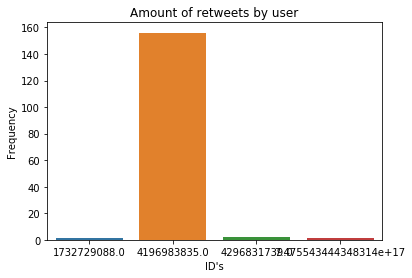

In [38]:
retweeted_user_id = result['retweeted_status_user_id'].value_counts()[1:5]
retweeted_user_id
ax = sns.barplot(x=retweeted_user_id.index, y=retweeted_user_id.values)
ax.set(xlabel='ID\'s', ylabel='Frequency')
ax.set_title('Amount of retweets by user')

##### 3. What is the distribuition of tweets during the day?

- From 5 to 14 are the times with few or no post.

In [59]:
result['hour'].value_counts().sort_index()

0     291
1     328
2     255
3     199
4     112
5      30
6       5
12      2
13      5
14      9
15     99
16    214
17    188
18    124
19    106
20     95
21     87
22     84
23    123
Name: hour, dtype: int64

##### 4. What is the distribuition of tweets during the days of the week?


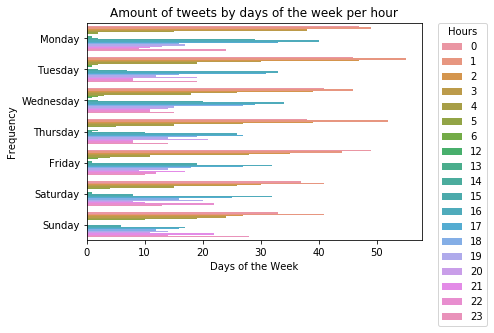

In [76]:
ax = sns.countplot(y=result['weekday'],hue=result['hour'],order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel='Days of the Week', ylabel='Frequency')
ax.set_title('Amount of tweets by days of the week per hour')
l = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
l.set_title('Hours')

##### 5. What is the source most used to post?


Text(0.5, 1.0, 'Amount of tweets by days of the week per hour')

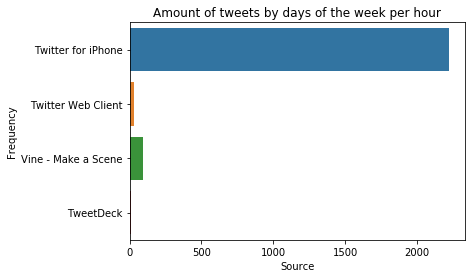

In [75]:
ax = sns.countplot(y=result['source'],orient="h")
ax.set(xlabel='Source', ylabel='Frequency')
ax.set_title('Amount of tweets by days of the week per hour')

##### 6. The presence of the dog name increase the amount of favorites and retweets?

In [170]:
result.groupby(['has_name'])[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
has_name,,
False,2936.754743,7209.747967
True,2822.877270,8087.767063


##### 7. The presence of the stage of dog increase the amount of favorites and retweets?


In [128]:
result.groupby(['doggo','floofer','pupper','puppo'])[['retweet_count','favorite_count']].mean()

retweet_count  favorite_count
doggo floofer pupper puppo                               
None  None    None   None     2673.655947     7472.808576
                     puppo    5812.034483    17049.586207
              pupper None     2554.315574     6297.008197
      floofer None   None     3848.000000    10446.444444
doggo None    None   None     6640.887500    16100.725000
                     puppo   17985.000000    45593.000000
              pupper None     4905.916667    10238.000000
      floofer None   None     3207.000000    16293.000000

##### 8. What is the distribuition os the tweets during the months

In [147]:
result.groupby(['year','month']).size()

year  month
2015  11       302
      12       388
2016  1        194
      2        125
      3        137
      4         60
      5         60
      6         97
      7        105
      8         75
      9         84
      10        88
      11        88
      12        70
2017  1         94
      2         88
      3         68
      4         60
      5         56
      6         59
      7         56
      8          2
dtype: int64

In [151]:
nr = pd.DataFrame({'count' : result.groupby(['year','month']).size()}).reset_index()
nr.head()

,year,month,count
0,2015,11,302
1,2015,12,388
2,2016,1,194
3,2016,2,125
4,2016,3,137


In [154]:
nr['year_month'] = nr['year'].map(str)+'-'+nr['month'].map(str)

In [155]:
nr.head()

,year,month,count,year_month
0,2015,11,302,2015-11
1,2015,12,388,2015-12
2,2016,1,194,2016-1
3,2016,2,125,2016-2
4,2016,3,137,2016-3


In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [156]:
dates = nr['year_month']
names = nr['count']

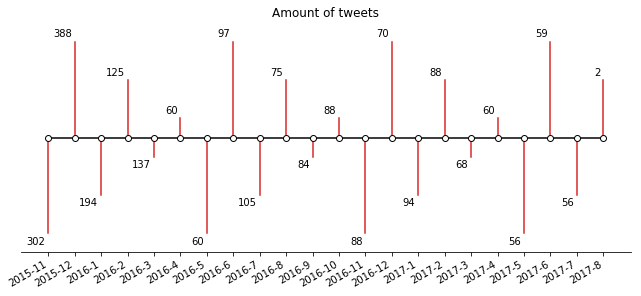

In [161]:

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Amount of tweets")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-")

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

### 2. Conclusion

1. São tweets de apenas um usuário, este usuário realiza suas postagens de seu celular (iPhone).
2. Suas postagens ocorrem durante a maior parte do dia. Porém, de 5 às 14 horas há poucas ou nenhuma postagem.
3. A presença do nome do cão na postagem não influencia no aumento de favoritos e retweets.
4. A presença de um dos estágios do cão (doggo, floofer, pupper e puppo) não aumenta o número de favoritos e retweets. No entanto, quando há doggo e puppo juntos, as postagem costumam conter mais retweets e favoritos.